***Importing Neccasities.***

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

***Data Frame Formation***

In [3]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
survival_df = pd.read_csv('gender_submission.csv')

***Previewing Data Frames***

In [4]:
print('Train Data:')
train_df.head(10)

Train Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print('Test Data:')
test_df.head(10)

Test Data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
print('Survival Data:')
survival_df.head(10)

Survival Data:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


***Adding survived column from survival data frame into test data frame***

In [7]:
test_df = pd.merge(test_df,survival_df,how='inner',on='PassengerId')
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


***Combining test and train to form one dataset***

In [8]:
df = pd.merge_ordered(test_df,train_df)

***Displaying ony those rows which have Age = NaN***

In [9]:
test = df[df['Age'].isna() & ((df['SibSp']==1) | (df['Parch']==1))]
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
46,47,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q,0
65,66,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,1
109,110,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,1
128,129,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,1
166,167,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,1
176,177,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,0
186,187,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,1
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0
229,230,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,0


***Ploting Scatter Plot***

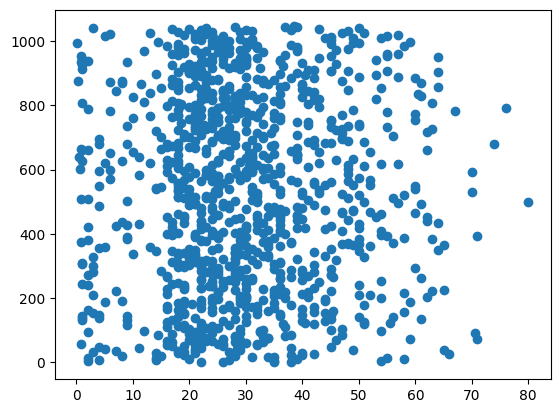

In [10]:
x = df[~(df['Age'].isna())]['Age']
y = np.arange(0,x.shape[0])
plt.scatter(x,y)

***Filling NaN in Age***

In [11]:
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\ali\AppData\Local\Temp\ipykernel_9436\1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


***Checking Wether NaN left in Ages***

In [12]:
df['Age'].isna().sum()

0

In [13]:
df.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


***Getting Stats of Survived Males and Females***

In [19]:
survived_stats = df.groupby('Sex')['Survived'].value_counts().unstack()
print(survived_stats)

Survived    0    1
Sex               
female     81  385
male      734  109


<Axes: xlabel='Sex'>

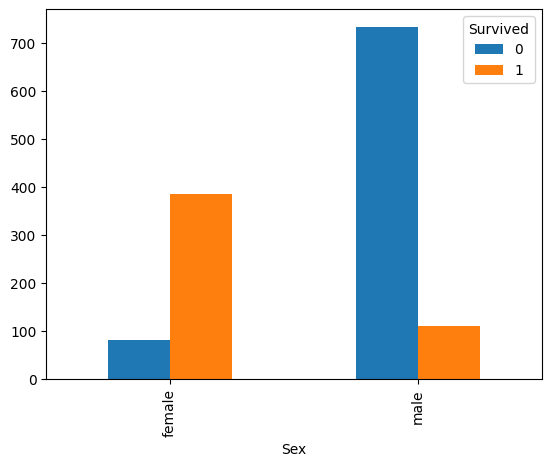

In [22]:
survived_stats.plot(kind='bar')

In [29]:
Survival_stats_with_beloved_one = df[(df['SibSp'] != 0) | (df['Parch'] != 0)].groupby('Sex')['Survived'].value_counts().unstack()

print(Survival_stats_with_beloved_one)

Survived    0    1
Sex               
female     54  218
male      202   45


<Axes: xlabel='Sex'>

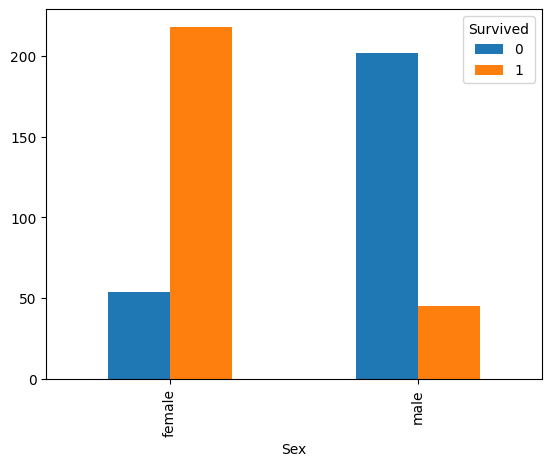

In [31]:
Survival_stats_with_beloved_one.plot(kind='bar')

In [32]:
Survival_stats_without_beloved_one = df[(df['SibSp'] == 0) & (df['Parch'] == 0)].groupby('Sex')['Survived'].value_counts().unstack()

print(Survival_stats_without_beloved_one)

Survived    0    1
Sex               
female     27  167
male      532   64


<Axes: xlabel='Sex'>

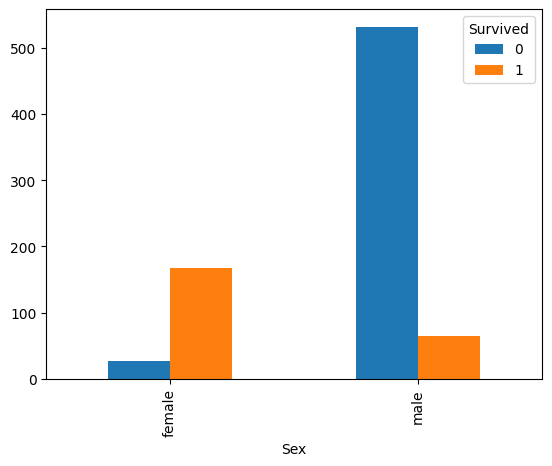

In [33]:
Survival_stats_without_beloved_one.plot(kind='bar')